# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import warnings
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

# Question 1

We use a nested loop to show how $\frac{H_F}{H_M}$ changes for different values of $\alpha$ and $\sigma$. This approach enables us to iterate through each value of $\alpha$ for every iteration of $\sigma$.

Finally, we generate two figures that illustrates the results of the ratio matrix $\frac{H_F}{H_M}$ for $\alpha$ and $\sigma$ respectively.  

c:\Users\jomo0\Desktop\Programmering\projects-2023-noobs\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma))+(par.alpha*HF**((par.sigma-1)/par.sigma)+1e-8))**(par.sigma/(par.sigma-1))


Relative hours = HF/HM = 3.00/5.50= 0.55 for alpha and sigma (0.25, 0.5)
Relative hours = HF/HM = 2.00/6.50= 0.31 for alpha and sigma (0.25, 1.0)
Relative hours = HF/HM = 1.50/7.00= 0.21 for alpha and sigma (0.25, 1.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 0.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.0)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.5)
Relative hours = HF/HM = 5.50/3.00= 1.83 for alpha and sigma (0.75, 0.5)
Relative hours = HF/HM = 6.50/2.00= 3.25 for alpha and sigma (0.75, 1.0)
Relative hours = HF/HM = 7.00/1.50= 4.67 for alpha and sigma (0.75, 1.5)


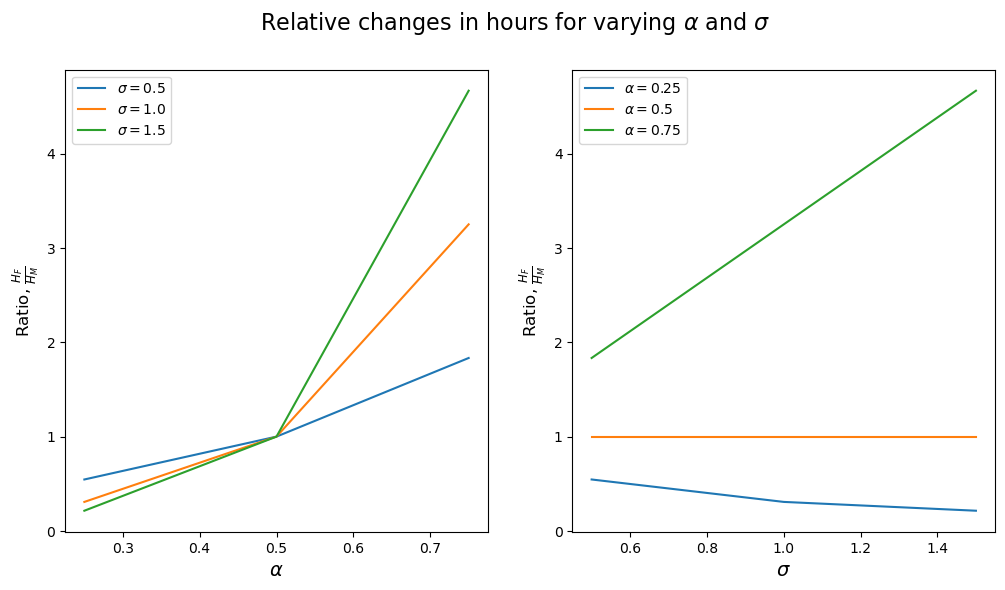

In [2]:
# Create zero vectors
HF_vec = {}
HM_vec = {}
ratio_vec = {}

# Using varying parameters of alpha and sigma
for alpha in [0.25, 0.50, 0.75]:    
    for sigma in [0.5, 1.0, 1.5]:
        # Set new values for alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        dsol = model.solve_discrete()
        
        # store the result
        HF_vec[(alpha, sigma)] = dsol.HF
        HM_vec[(alpha, sigma)] = dsol.HM
        ratio_vec[(alpha, sigma)] = dsol.HF/dsol.HM

        # print results
        print(f'Relative hours = HF/HM = {dsol.HF:.2f}/{dsol.HM:.2f}= {dsol.HF/dsol.HM:.2f} for alpha and sigma {alpha, sigma}')
                       
# We plot the results
# a. create the figure
fig = plt.figure(figsize=(12,6))# figsize is in inches...

# b. left plot
ax_left = fig.add_subplot(1,2,1)
for sigma in [0.5, 1.0, 1.5]:
    y = [ratio_vec[(alpha, sigma)] for alpha in [0.25, 0.50, 0.75]]
    ax_left.plot([0.25, 0.50, 0.75], y, label=rf"$\sigma={sigma}$")
ax_left.set_xlabel(r'$\alpha$',fontsize=14)
ax_left.set_ylabel(rf"Ratio, $\frac{{H_F}}{{H_M}}$",fontsize=12)
ax_left.legend()


# c. right plot
ax_right = fig.add_subplot(1,2,2)
for alpha in [0.25, 0.50, 0.75]:
    y = [ratio_vec[(alpha, sigma)] for sigma in [0.5, 1.0, 1.5]]
    ax_right.plot([0.5, 1.0, 1.5], y, label=rf"$\alpha={alpha}$")
ax_right.set_xlabel(r'$\sigma$',fontsize=14)
ax_right.set_ylabel(rf"Ratio, $\frac{{H_F}}{{H_M}}$",fontsize=12)
ax_right.legend()



plt.close(fig) # (Suppress print to fit slides) 
fig.suptitle(rf"Relative changes in hours for varying $\alpha$ and $\sigma$",fontsize=16)
fig


We find that the ratio is positively correlated with $\alpha$. And the ratio increases in $\sigma$ when $\alpha$ is high, and decreases in $\sigma$ when $\alpha$ is low.


# Question 2

The log optimal relative hours at home is 0.223 for a log relative wage of -0.22 when wF = 0.8
The log optimal relative hours at home is 0.000 for a log relative wage of -0.11 when wF = 0.9
The log optimal relative hours at home is 0.000 for a log relative wage of 0.00 when wF = 1.0
The log optimal relative hours at home is -0.118 for a log relative wage of 0.10 when wF = 1.1
The log optimal relative hours at home is -0.223 for a log relative wage of 0.18 when wF = 1.2


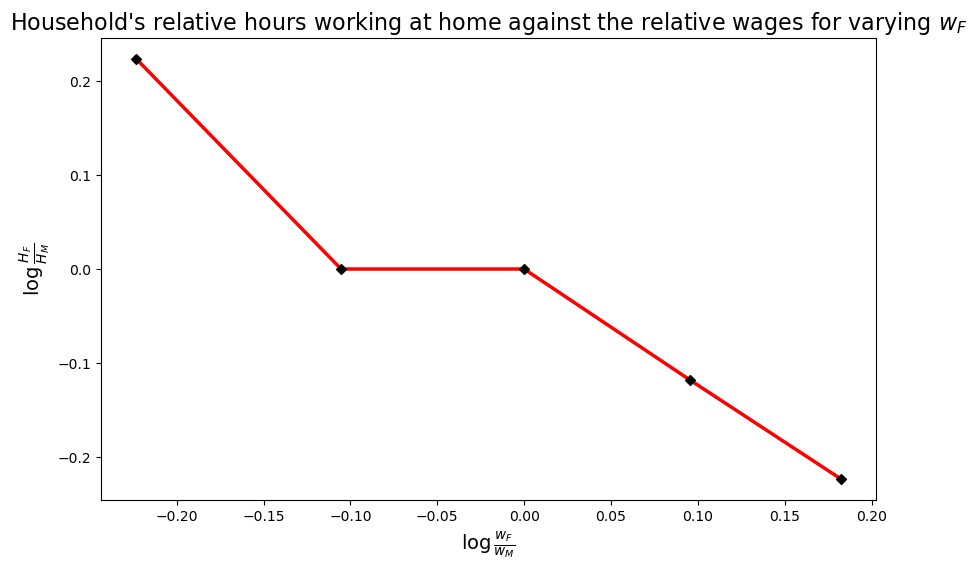

In [3]:
# set baseline values
model.par.alpha = 0.5
model.par.sigma = 1

# b. solving the baseline model discretely from class
model.solve_wF_vec(discrete=True, do_print=True)

# save results of wF/wM log ratio (log ratio of HF/HM is saved in class).
log_wFwM = np.log(model.par.wF_vec) # as wM is normalized to 1

# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)
ax.scatter(log_wFwM, model.sol.logHFHM_vec, color='black', marker='D', s=25, zorder=10)
ax.plot(log_wFwM, model.sol.logHFHM_vec, color='red', lw=2.5)
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Household's relative hours working at home against the relative wages for varying $w_F$",fontsize=16)
plt.show()

We find that when $w_F\rightarrow1.2$, will the relative wages increase, and relative hours working at home decrease. This is because females substitutes going to work for working at home as their wages increases. 
For $w_F=1$ will men and females earn the same wage and therefore work the same amount at home.

# Question 3

Explain your code and procedure

The log optimal relative hours at home is 0.223 for a log relative wage of -0.22 when wF = 0.8
The log optimal relative hours at home is 0.105 for a log relative wage of -0.11 when wF = 0.9
The log optimal relative hours at home is 0.000 for a log relative wage of 0.00 when wF = 1.0
The log optimal relative hours at home is -0.095 for a log relative wage of 0.10 when wF = 1.1
The log optimal relative hours at home is -0.182 for a log relative wage of 0.18 when wF = 1.2


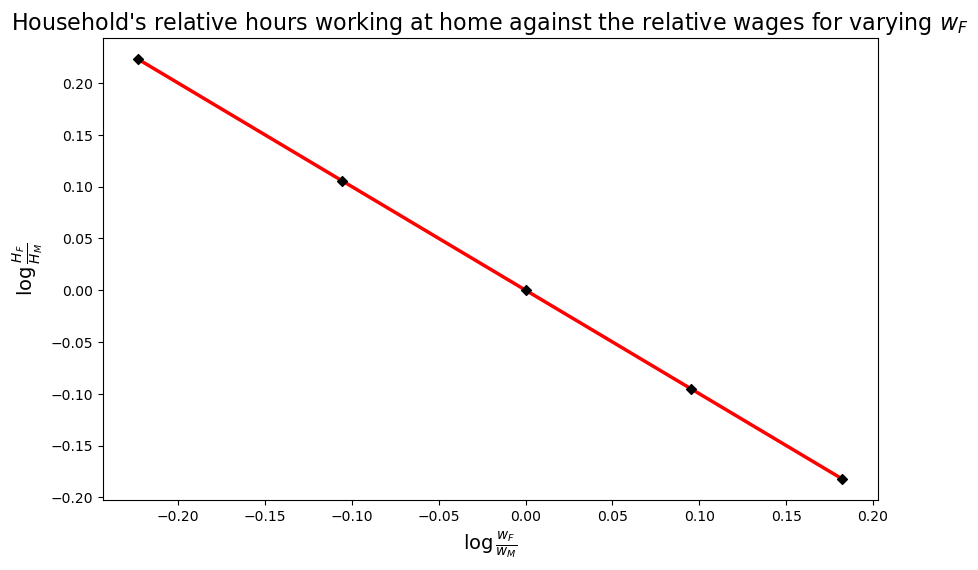

In [4]:
# a. solving the baseline model continously from class
model.solve_wF_vec(do_print=True)

# b. create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# i. plot the log values
ax = fig.add_subplot(1, 1, 1)
ax.scatter(log_wFwM, model.sol.logHFHM_vec, color='black', marker='D', s=25, zorder=10)
ax.plot(log_wFwM, model.sol.logHFHM_vec, color='red', lw=2.5)
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Household's relative hours working at home against the relative wages for varying $w_F$",fontsize=16)
plt.show()

We find that when the variables are constraint in a continously interval $[0,24]$ will we not get the same kink as in question 2.

# Question 4

In [5]:
# ignore specific runtimewarnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered")

# a. estimate the values of alpha and sigma that minimizes the error function
model.estimate(do_print=True)

Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
the error function is minimized at alpha = 0.982 and sigma = 0.100


We find that the function $\left(\beta_0-\hat{\beta_0}\right)^2+\left(\beta_1-\hat{\beta_1}\right)^2$ is minimized for $\alpha=0.982$ and $\sigma=0.1$

From the data we found that $\alpha=0.982$ and $\sigma=0.1$, which means that females are more productive at home than men for the high value of $\alpha$, which explains the high level of the green line compared to the red line in the figure above. The low value of $\sigma$ means that the elasticity of substitution is low, and therefore requires huge changes in the wage of the females, before they substitutes working at home for working, which explains the low slope of the green line compared to the red line in the figure above.

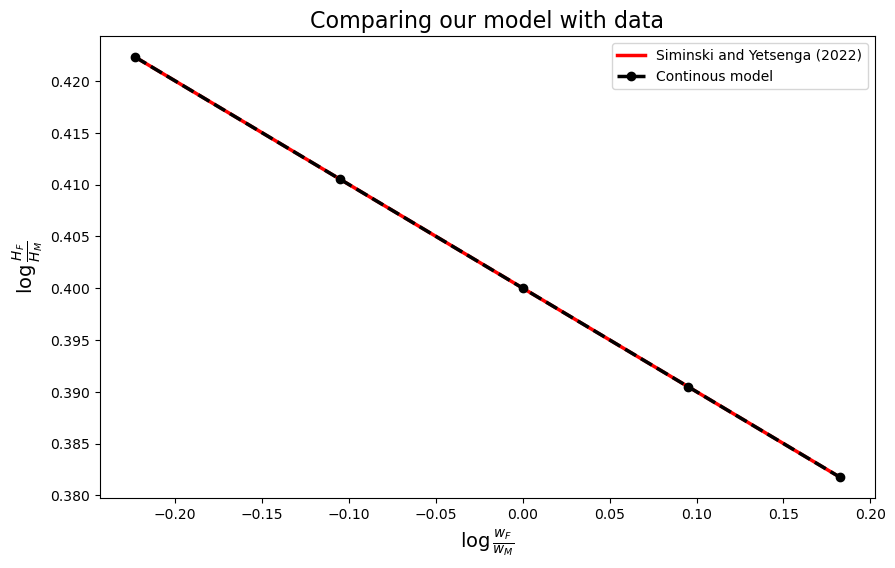

In [6]:
# Siminski and Yetsenga (2022) results
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)

# plot data and model
ax.plot(x, y, color='red', linestyle='-', lw=2.5, label = rf"Siminski and Yetsenga (2022)") 

# plot for data
ax.plot(log_wFwM, model.sol.logHFHM_vec, color='black', marker='o', linestyle='--', lw=2.5, label = rf"Continous model") 

# set labels
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title( rf"Comparing our model with data", fontsize=16)
plt.legend()
plt.show()

# Question 5

In [7]:
model_sigma = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

# ignore specific warning message
np.seterr(over='ignore')

# a. estimate the values of alpha and sigma that minimizes the error function
model_sigma.estimate(alpha=0.5, do_print=True)

Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
the error function is minimized at alpha = 0.500 and sigma = 0.100


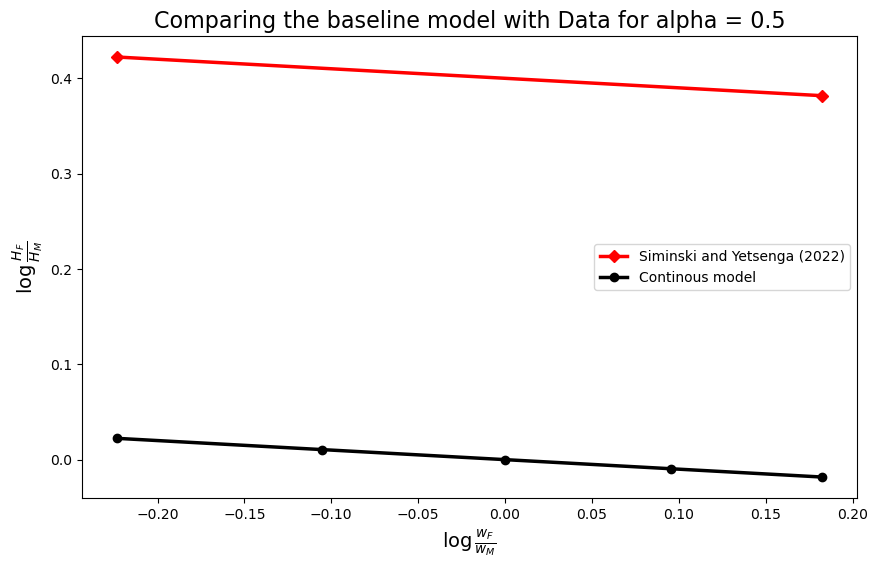

In [8]:
# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)

# plot for data and model
ax.plot(x, y, color='red', marker='D', linestyle='-', lw=2.5, label = rf"Siminski and Yetsenga (2022)") # wM is normalized to 1 and we can thus take the relative wages as wF
ax.plot(log_wFwM, model_sigma.sol.logHFHM_vec, color='black', marker='o', linestyle='-', lw=2.5, label = rf"Continous model") # wM is normalized to 1 and we can thus take the relative wages as wF

# set labels
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Comparing the baseline model with Data" + " for alpha = 0.5", fontsize=16)
plt.legend()
plt.show()

In [9]:
model_extended = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

# a. estimate the values of alpha and sigma that minimizes the error function
model_extended.estimate(alpha=0.5, do_print=True, extended=True)

Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization 

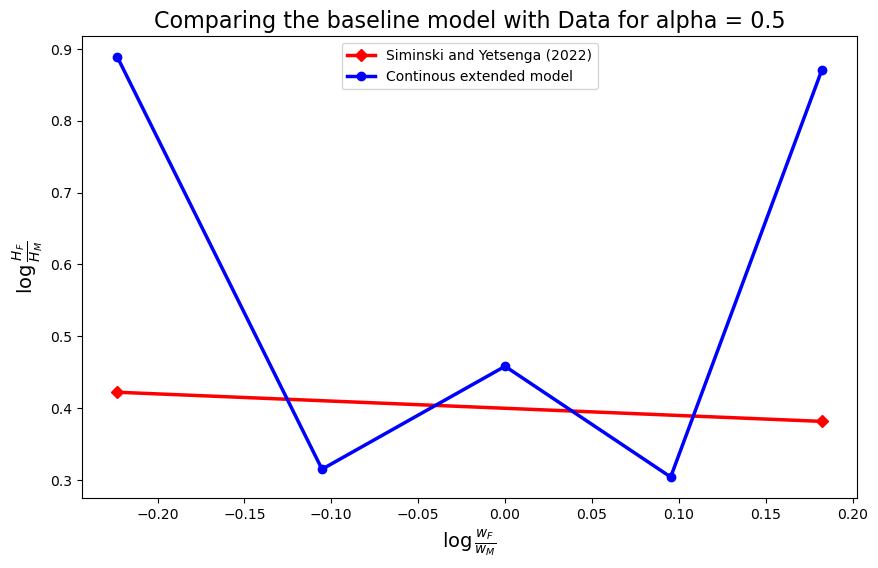

In [10]:
# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)

# plot for model
ax.plot(x, y, color='red', marker='D', linestyle='-', lw=2.5, label = rf"Siminski and Yetsenga (2022)")

# plot for data
ax.plot(log_wFwM, model_extended.sol.logHFHM_vec, color='blue', marker='o', linestyle='-', lw=2.5, label = rf"Continous extended model")

# set labels
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Comparing the baseline model with Data" + " for alpha = 0.5", fontsize=16)
plt.legend()
plt.show()